In [ ]:
pip freeze > requirements.txt

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
import nltk
import re
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout
from keras.callbacks import ModelCheckpoint

In [ ]:
li = []
all_files=['trainDataInCSV.csv','validDataInCSV.csv']
for filename in all_files:

    df = pd.read_csv(filename, index_col=None, header=0)

    li.append(df)

dfs=pd.concat(li, axis=0, ignore_index=True)

In [ ]:
dfs.head(10)

,Index No.,Intent,Sentence
0,0,AddToPlaylist,Add Don and Sherri to my Meditate to Sounds of...
1,1,AddToPlaylist,put United Abominations onto my rare groove pl...
2,2,AddToPlaylist,add the tune by misato watanabe to the Trapeo ...
3,3,AddToPlaylist,add this artist to my this is miguel bosé play...
4,4,AddToPlaylist,add heresy and the hotel choir to the evening ...
5,5,AddToPlaylist,Please add Jency Anthony to my playlist This I...
6,6,AddToPlaylist,Add an album to my list La Mejor Música Dance ...
7,7,AddToPlaylist,Add shame on you to my masters of metal playlist
8,8,AddToPlaylist,Add artist to playlist Epic Gaming
9,9,AddToPlaylist,Add The Private Collection onto my Cena Elegan...


In [ ]:
intent=dfs['Intent']
unique_intent=list(set(intent))
sentences=list(dfs['Sentence'])


In [ ]:
print(len(dfs))

13784


In [ ]:
print(unique_intent)

['PlayMusic', 'RateBook', 'GetWeather', 'BookRestaurant', 'SearchCreativeWork', 'AddToPlaylist', 'SearchScreeningEvent']


In [ ]:
print(sentences[:5])

['Add Don and Sherri to my Meditate to Sounds of Nature playlist', 'put United Abominations onto my rare groove playlist', 'add the tune by misato watanabe to the Trapeo playlist', 'add this artist to my this is miguel bosé playlist', 'add heresy and the hotel choir to the evening acoustic playlist']


***PREPROCESSING***

In [ ]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stemmer = LancasterStemmer()

In [ ]:
def cleaning(sentences):
  words = []
  for s in sentences:
    clean = re.sub(r'[^ a-z A-Z 0-9]', " ", s)
    w = word_tokenize(clean)
    #stemming
    words.append([i.lower() for i in w])
    
  return words

In [ ]:
cleaned_words = cleaning(sentences)
print(len(cleaned_words))
print(cleaned_words[:2])

13784
[['add', 'don', 'and', 'sherri', 'to', 'my', 'meditate', 'to', 'sounds', 'of', 'nature', 'playlist'], ['put', 'united', 'abominations', 'onto', 'my', 'rare', 'groove', 'playlist']]


In [ ]:
def create_tokenizer(words, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~'):
  token = Tokenizer(filters = filters)
  token.fit_on_texts(words)
  return token

In [ ]:
def max_length(words):
  return(len(max(words, key = len)))

In [ ]:
word_tokenizer = create_tokenizer(cleaned_words)
vocab_size = len(word_tokenizer.word_index) + 1
max_length = max_length(cleaned_words)

print("Vocab Size = %d and Maximum length = %d" % (vocab_size, max_length))

Vocab Size = 11409 and Maximum length = 35


In [ ]:
def encoding_doc(token, words):
  return(token.texts_to_sequences(words))

In [ ]:
encoded_doc = encoding_doc(word_tokenizer, cleaned_words)

In [ ]:
def padding_doc(encoded_doc, max_length):
  return(pad_sequences(encoded_doc, maxlen = max_length, padding = "post"))

In [ ]:

padded_doc = padding_doc(encoded_doc, max_length)

In [ ]:
padded_doc[:5]

array([[  12,  556,   24, 2234,    4,   15, 2980,    4, 1161,    6,  360,
          16,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  74,  418, 4604,  149,   15, 1509,  180,   16,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  12,    1,   77,   26, 4605, 4606,    4,    1, 1792,   16,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  12,   19,   95,    4,   15,   19,   10, 4607, 4608,   16,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  12, 4609,   24,   

In [ ]:

print("Shape of padded docs = ",padded_doc.shape)

Shape of padded docs =  (13784, 35)


In [ ]:
output_tokenizer = create_tokenizer(unique_intent, filters = '!"#$%&()*+,-/:;<=>?@[\]^`{|}~')

In [ ]:
output_tokenizer.word_index

{'addtoplaylist': 6,
 'bookrestaurant': 4,
 'getweather': 3,
 'playmusic': 1,
 'ratebook': 2,
 'searchcreativework': 5,
 'searchscreeningevent': 7}

In [ ]:
encoded_output = encoding_doc(output_tokenizer, intent)

In [ ]:
import numpy as np
encoded_output = np.array(encoded_output).reshape(len(encoded_output), 1)

In [ ]:
encoded_output.shape

(13784, 1)

***ONE HOT ENCODING***

In [ ]:
def one_hot(encode):
  o = OneHotEncoder(sparse = False)
  return(o.fit_transform(encode))

In [ ]:
output_one_hot = one_hot(encoded_output)

In [ ]:
output_one_hot.shape

(13784, 7)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_Y, val_Y = train_test_split(padded_doc, output_one_hot, shuffle = True, test_size = 0.2)

In [ ]:
print("Shape of train_X = %s and train_Y = %s" % (train_X.shape, train_Y.shape))
print("Shape of val_X = %s and val_Y = %s" % (val_X.shape, val_Y.shape))

Shape of train_X = (11027, 35) and train_Y = (11027, 7)
Shape of val_X = (2757, 35) and val_Y = (2757, 7)


***LSTM MODEL CREATION***

In [ ]:
def create_model(vocab_size, max_length):
  model = Sequential()
  model.add(Embedding(vocab_size, 128, input_length = max_length, trainable = False))
  model.add(Bidirectional(LSTM(128)))
#   model.add(LSTM(128))
  model.add(Dense(32, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(7, activation = "softmax"))
  
  return model

In [ ]:
model = create_model(vocab_size, max_length)

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 128)           1460352   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 32)                8224      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 231       
Total params: 1,731,975
Trainable params: 271,623
Non-trainable params: 1,460,352
_________________________________________________________________


In [ ]:
filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

hist = model.fit(train_X, train_Y, epochs =20, batch_size = 32, validation_data = (val_X, val_Y), callbacks = [checkpoint])

Epoch 1/20
345/345 [==============================] - 35s 89ms/step - loss: 1.6370 - accuracy: 0.3549 - val_loss: 0.6432 - val_accuracy: 0.7856

Epoch 00001: val_loss improved from inf to 0.64319, saving model to model.h5
Epoch 2/20
345/345 [==============================] - 30s 88ms/step - loss: 0.6965 - accuracy: 0.7608 - val_loss: 0.3520 - val_accuracy: 0.8915

Epoch 00002: val_loss improved from 0.64319 to 0.35204, saving model to model.h5
Epoch 3/20
345/345 [==============================] - 30s 87ms/step - loss: 0.4971 - accuracy: 0.8516 - val_loss: 0.2469 - val_accuracy: 0.9278

Epoch 00003: val_loss improved from 0.35204 to 0.24693, saving model to model.h5
Epoch 4/20
345/345 [==============================] - 30s 86ms/step - loss: 0.3501 - accuracy: 0.8986 - val_loss: 0.2147 - val_accuracy: 0.9351

Epoch 00004: val_loss improved from 0.24693 to 0.21467, saving model to model.h5
Epoch 5/20
345/345 [==============================] - 29s 86ms/step - loss: 0.2989 - accuracy: 0.908

In [ ]:
model = load_model("model.h5")

In [ ]:
def predictions(text):
  clean = re.sub(r'[^ a-z A-Z 0-9]', " ", text)
  test_word = word_tokenize(clean)
  test_word = [w.lower() for w in test_word]
  test_ls = word_tokenizer.texts_to_sequences(test_word)
  #print(test_word)
  #Check for unknown words
  if [] in test_ls:
    test_ls = list(filter(None, test_ls))
    
  test_ls = np.array(test_ls).reshape(1, len(test_ls))
 
  x = padding_doc(test_ls, max_length)
  
  pred = model.predict(x)

  return pred
  
  

In [85]:
def get_final_intent(pred, classes):

  predictions = pred[0]
 
  classes = np.array(classes)
  ids = np.argsort(-predictions)
  classes = classes[ids]
  predictions = -np.sort(-predictions)
  class_names=[]

  for class_name in range(0,3):     #To get the top three class names in accordance to the confidence scores we have got.
    class_names.append(classes[class_name])


  return class_names


  
  #for i in range(pred.shape[1]):   #dehash the block of comment statements to see all the available intents along with their respective confidence scores for a given query.
    #print()
    #print("%s has confidence score : %s" % (classes[i], (predictions[i])))
    #print()



    
    
  #return classes[0],predictions[0]  #dehash the comment statement to get the intent along with the confidence score.

  #return classes[0]    #dehash the comment statement to  get the intent alone and it is used when running the true-positive rate evaluation code block.
    
            
  

***TRUE-POSITIVE RATE EVALUATION***

In [ ]:
#TruePositive Rate on testData_SNIPS

dfs=pd.read_csv('testDataInCSV.csv')
tp=0
for i in range(0,len(dfs)):
  utterance=dfs._get_value(i,'Sentence')
  pred=predictions(utterance)
  x=get_final_intent(pred,unique_intent)
  label=dfs._get_value(i,'Intent')
  if x==label:
    tp=tp+1
print('Number of True Positives :',tp)
tpr=(tp)/(len(dfs))
print('True Positive Rate:',tpr)
  


Number of True Positives : 672
True Positive Rate: 0.96


In [ ]:
dfs.head(10)   #A view on the SNIPS test dataset.

,Index No.,Intent,Sentence
0,0,AddToPlaylist,I'd like to have this track onto my Classical ...
1,1,AddToPlaylist,Add the album to my Flow Español playlist.
2,2,AddToPlaylist,add digging now to my Young at Heart playlist
3,3,AddToPlaylist,add this song by Too Poetic to my Piano Ballad...
4,4,AddToPlaylist,Add this album to Old School Death Metal
5,5,AddToPlaylist,I need to add baro ferret to the Urban Hits un...
6,6,AddToPlaylist,Add the album to the Might and Myth Power Meta...
7,7,AddToPlaylist,"To the travelling playlist, please add this Da..."
8,8,AddToPlaylist,Please add some Pete Townshend to my playlist ...
9,9,AddToPlaylist,I'd like for Kasey Chambers 's tune to be an a...


***PREDICTING THE INTENT CLASS***

In [ ]:
query='Alexa, Play Demons track by Imagine Dragons from Spotify'
pred = predictions(query)
class_name,conf_score=get_final_intent(pred, unique_intent)

print(query)
print('Intent : ',class_name)
print('Confidence Score :',conf_score)



Alexa, Play Demons track by Imagine Dragons from Spotify
Intent :  PlayMusic
Confidence Score : 0.9995523


In [ ]:
query='add heresy and the hotel choir to the evening acoustic playlist'
pred = predictions(query)
class_name,conf_score=get_final_intent(pred, unique_intent)

print(query)
print('Intent : ',class_name)
print('Confidence Score :',conf_score)



add heresy and the hotel choir to the evening acoustic playlist
Intent :  AddToPlaylist
Confidence Score : 0.99999845


In [ ]:
query='Book a table for two people at Seashell on next friday'
pred=predictions(query)
class_name,conf_score=get_final_intent(pred,unique_intent)

print(query)
print('Intent : ',class_name)
print('Confidence Score :',conf_score)

Book a table for two people at Seashell on next friday
Intent :  BookRestaurant
Confidence Score : 0.9999993


In [ ]:
query='is it snowing it out there at London right now?'
pred=predictions(query)
class_name,conf_score=get_final_intent(pred,unique_intent)

print(query)
print('Intent : ',class_name)
print('Confidence Score :',conf_score)



Is it snowing out there at London right now?
Intent :  GetWeather
Confidence Score : 0.99996054


***TRAINING AND VALIDATION ACCURACY GRAPH PLOTS***

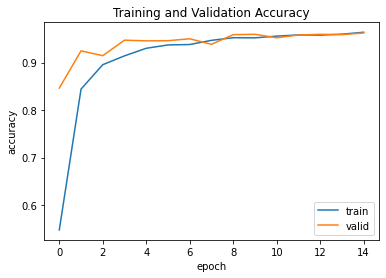

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()



***TRAINING AND VALIDATION LOSS GRAPH PLOTS***

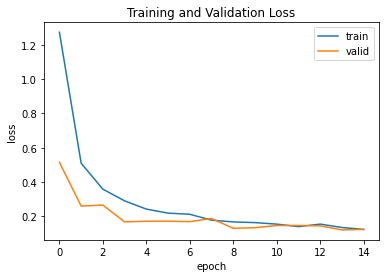

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [87]:
file = open("queries.txt", "r")
queries=[]
for i in range(0,11):  
  line=file.readline()
  queries.append(line)


class_table = []


for query in queries:

  pred = predictions(query)
  class_names=get_final_intent(pred, unique_intent)
  class_table.append(
    [
      query,
      class_names,
    ]
  )

df = pd.DataFrame(class_table, columns=['Query', 'Intent'])

#pd.set_option('display.max_columns', 999)
#pd.set_option('expand_frame_repr', False)
print(df.to_markdown(tablefmt="grid"))



+----+-----------------------------------------------------------------------------------+--------------------------------------------------------------+
|    | Query                                                                             | Intent                                                       |
+====+===================================================================================+==============================================================+
|  0 | Alexa, Play Demons track by Imagine Dragons from Spotify                          | ['PlayMusic', 'SearchCreativeWork', 'AddToPlaylist']         |
+----+-----------------------------------------------------------------------------------+--------------------------------------------------------------+
|  1 | is it snowing it out there at London right now?                                   | ['GetWeather', 'SearchScreeningEvent', 'SearchCreativeWork'] |
+----+----------------------------------------------------------------------